In [18]:
%cd 'drive/My Drive/STEP/files/lecture4'

[Errno 2] No such file or directory: 'drive/My Drive/STEP/files/lecture4'
/content/drive/My Drive/STEP/files/lecture4


# Lecture4 Assignment 1
## Visualize SNS / SNSを可視化してみる
 

1.   Use Networkx (https://networkx.github.io/documentation/stable/tutorial.html) to visualize the SNS network (Networkx ライブラリを使って可視化)
2.   Cluster people into classes using K-means (K-meansでクラスタリング)



In [0]:
## Data preparation

# Import necessary libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from collections import defaultdict

# Read files
nickname_file = open("nickname.txt", 'r')
nickname_list = list(nickname_file.read().split('\n'))
nickname_file.close()
links_file = open("links.txt", 'r')
links_list = list(links_file.read().split('\n'))
links_file.close()

# Create a dictionary which maps the index to the nickname
nickname_map = {}
for item in nickname_list:
  idx, name = item.split()
  nickname_map[idx] = name

names = list(nickname_map.values())
graph = defaultdict(list)

n_people = len(nickname_map)
relation_matrix = []


# Converting the list of relations to a graph and matrix for visualization
for item in links_list:
  followed, follower = item.split()
  relation_matrix.append([int(followed), int(follower)])
relation_matrix = np.array(relation_matrix)


Text(0.5, 1.0, 'Distribution of people')

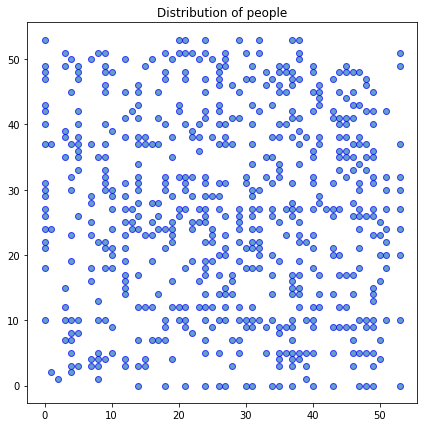

In [21]:
# Visualize distribution

plt.figure(figsize=(7,7))
plt.scatter(relation_matrix[:,0], relation_matrix[:,1], alpha=0.7, edgecolors='b')
plt.title('Distribution of people')

In [0]:
def draw_graph(G, title = None):
    plt.figure(figsize = (12,12))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    plt.title(title)
    plt.show()
    

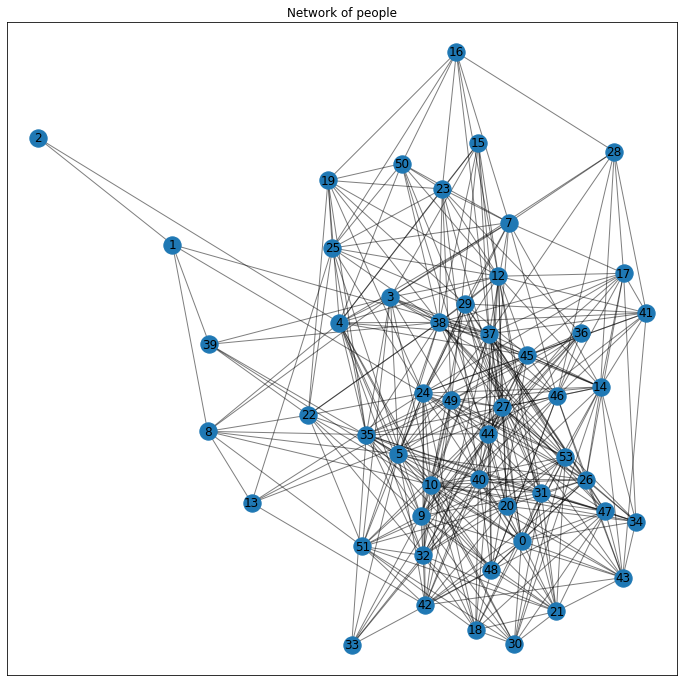

In [49]:
G = nx.Graph()
G.add_edges_from(relation_matrix)
draw_graph(G, 'Network of people')

# Clustering nodes based on their eigenvalues
- We first convert the graph into an adjacency matrix.
- Then we calculate its degree matrix and laplacian matrix.

In [145]:
from scipy.sparse import csr_matrix

# Adjacency Matrix 
W = np.zeros((n_people, n_people))
for i, j in relation_matrix:
  W[i,j] = 1
print('Adjancency matrix:')
print(W)

# Convert to SciPy matrix
W = csr_matrix(W)

# Degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('Degree matrix:')
print(D)

# Laplacian matrix
L = D - W
print('Laplacian matrix:')
print(L)

Adjancency matrix:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]
Degree matrix:
[[18.  0.  0. ...  0.  0.  0.]
 [ 0.  3.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  9.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. 10.]]
Laplacian matrix:
[[18.  0.  0. ...  0.  0. -1.]
 [ 0.  3. -1. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  9.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [-1.  0.  0. ... -1.  0. 10.]]


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


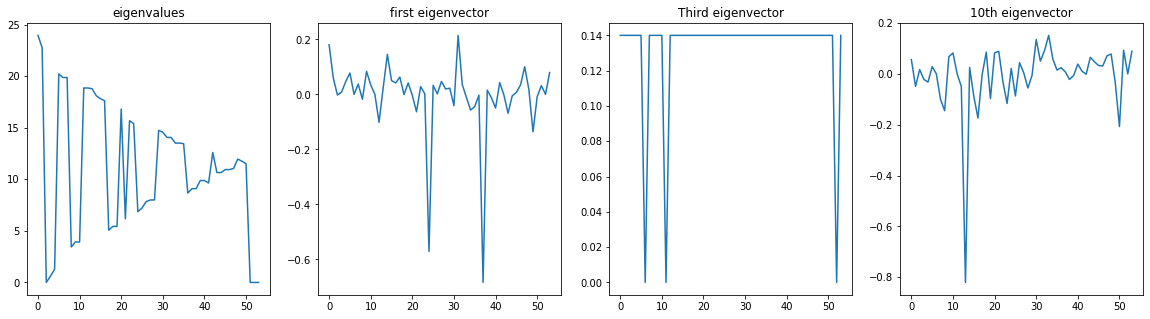

In [271]:
e, v = np.linalg.eig(L)

fig = plt.figure(figsize=[20, 5])
ax1 = plt.subplot(141)
plt.plot(e)
ax1.title.set_text('eigenvalues')
#i = np.where(e < 10e-10)[0]
i = np.where(e < 50)[0]
ax2 = plt.subplot(142)
plt.plot(v[:, i[0]])
ax2.title.set_text('first eigenvector')
ax3 = plt.subplot(143)
plt.plot(v[:, i[2]])
ax3.title.set_text('Third eigenvector')
ax4 = plt.subplot(144)
plt.plot(v[:, i[10]])
ax4.title.set_text('10th eigenvector')

In [0]:

from sklearn.cluster import KMeans
U = np.array(v[:, i[0]].real)
km = KMeans(init='k-means++', n_clusters=3)
km_cluster = km.fit(U)
km_labels = km_cluster.labels_

In [268]:
km_labels

array([2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 2], dtype=int32)

In [0]:
km_labels_with_position = km_labels[list(pos.keys())]
class1 = np.where(km_labels==0)[0].tolist()
class2 = np.where(km_labels==1)[0].tolist()
class3 = np.where(km_labels==2)[0].tolist()
class1_with_positions = []
class2_with_positions = []
class3_with_positions = []

nodes_with_position = list(pos.keys())
for j in class1:
  if j in nodes_with_position:
    class1_with_positions.append(j)
for j in class2:
  if j in nodes_with_position:
    class2_with_positions.append(j)
for j in class3:
  if j in nodes_with_position:
    class3_with_positions.append(j)


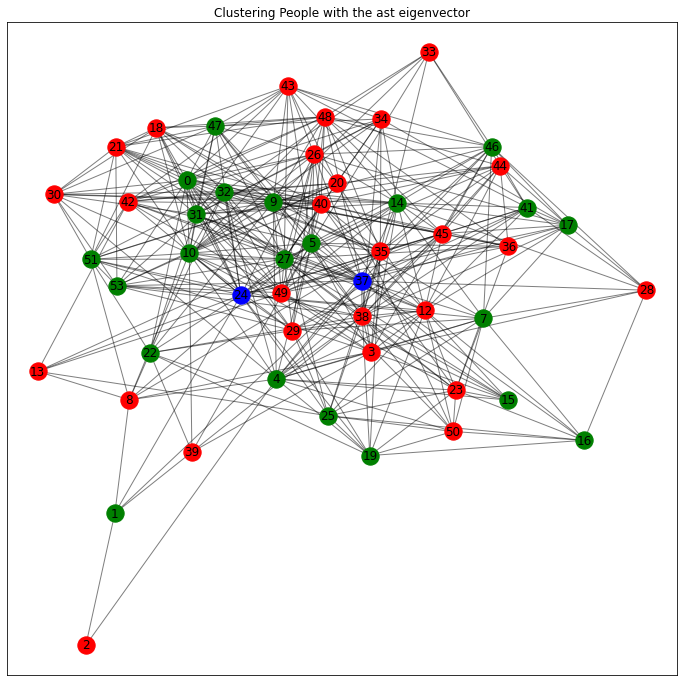

In [270]:
plt.figure(figsize = (12,12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist = class1_with_positions, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist = class2_with_positions, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist = class3_with_positions, node_color='g')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
plt.title('Clustering People with the ast eigenvector')
plt.show()

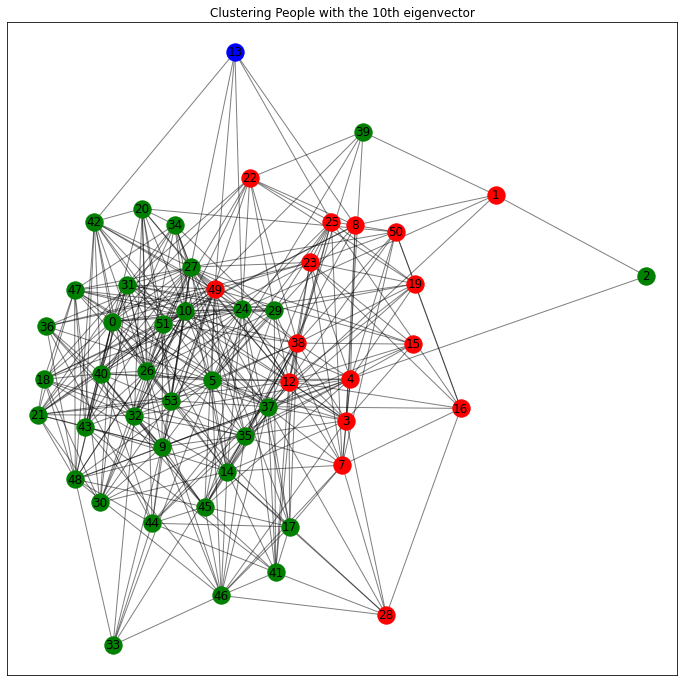

In [274]:
from sklearn.cluster import KMeans
U = np.array(v[:, i[10]].real)
km = KMeans(init='k-means++', n_clusters=3)
km_cluster = km.fit(U)
km_labels = km_cluster.labels_

km_labels_with_position = km_labels[list(pos.keys())]
class1 = np.where(km_labels==0)[0].tolist()
class2 = np.where(km_labels==1)[0].tolist()
class3 = np.where(km_labels==2)[0].tolist()
class1_with_positions = []
class2_with_positions = []
class3_with_positions = []

nodes_with_position = list(pos.keys())
for j in class1:
  if j in nodes_with_position:
    class1_with_positions.append(j)
for j in class2:
  if j in nodes_with_position:
    class2_with_positions.append(j)
for j in class3:
  if j in nodes_with_position:
    class3_with_positions.append(j)

plt.figure(figsize = (12,12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist = class1_with_positions, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist = class2_with_positions, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist = class3_with_positions, node_color='g')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
plt.title('Clustering People with the 10th eigenvector')
plt.show()

- なんとなく分類できました。